# Assignment 2: Evaluation metrics for classification

In this assignment, we will be exploring metrics for evaluating classification models. We use the problem in the previous assignment which is **Home Credit Default Risk** that predicts whether a loan client can repay the loan money. The previous assignment uses the ROCAUC metric which is a really good and widely use in practice for evaluating classification models. In this assignment we look at precision, recall, f1 metrics also plotting the rocauc curve. The purpose of this assignment is not trying to find the best model for the classification problem, we just practice calculating common used metrics instead. We will use **Logistic Regression**, **Gradient Boost Machine** and **Neural Network** for calculating the metrics. Below are the things you will do:
<br>
- Train **Logistic Regression**, **Gradient Boost Machine** and **Neural Network** models
- Compute confusion matrix
- Calculate precision and recall
- Calculate f1
- Plot rocauc graph

### Import some libs

In [1]:
import pandas as pd
import numpy as np

## Loading the data

We use the same data set from the previous assignment, but we only use the train dataset because we do not have labels for the test dataset (you submit to Kaggle to check your result), so we split the original train dataset into new train and test datasets instead.

In [2]:
import pickle

with open('/content/drive/MyDrive/FUNIX Progress/MLP303x_1.1-A_EN/data/home_credit_data.pickle', 'rb') as f:
    features, labels, _, _ = pickle.load(f)

feature_names = list(features.columns)
print('features shape: {}'.format(features.shape))
print('labels shape: {}'.format(labels.shape))

# you should get
# features shape: (307511, 240)
# labels shape: (307511,)

features shape: (307511, 240)
labels shape: (307511,)


## Split the dataset
Because this dataset is imbalanced, we do not split it right the way because we might end up with no sample with label 1. We instead split the samples with only label 1 and 0 separately and then concatenate them together.

### Get samples that are corresponding to their labels
Complete the cell below to get features, labels with 0 and 1 seperately.

In [3]:
features0 = features[labels == 0]
features1 = features[labels == 1]
labels0 = labels[labels == 0]
labels1 = labels[labels == 1]

print("features0 shape: ", features0.shape)
print("features1 shape: ", features1.shape)
print("labels0 shape: ", labels0.shape)
print("labels1 shape: ", labels1.shape)

# you should get
# features0 shape:  (282686, 240)
# features1 shape:  (24825, 240)
# labels0 shape:  (282686,)
# labels1 shape:  (24825,)

features0 shape:  (282686, 240)
features1 shape:  (24825, 240)
labels0 shape:  (282686,)
labels1 shape:  (24825,)


### Split train test
Run the cell below to split the samples with label 1 and 0 separately.

In [4]:
from sklearn.model_selection import train_test_split


X_train0, X_test0, y_train0, y_test0 = train_test_split(
    features0, labels0, test_size=0.1, random_state=42
)

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    features1, labels1, test_size=0.15, random_state=42
)

print("y_train0.shape: ", y_train0.shape)
print("y_test0.shape: ", y_test0.shape)
print("y_train1.shape: ", y_train1.shape)
print("y_test1.shape", y_test1.shape)

# You should get
# y_train0.shape:  (254417,)
# y_test0.shape:  (28269,)
# y_train1.shape:  (21101,)
# y_test1.shape (3724,)

y_train0.shape:  (254417,)
y_test0.shape:  (28269,)
y_train1.shape:  (21101,)
y_test1.shape (3724,)


### Concatenate train, test
Lets concatenate to get the final train, test dataset.

In [5]:
X_train = np.concatenate((X_train0, X_train1), axis=0)
X_test = np.concatenate((X_test0, X_test1), axis=0)
y_train = np.concatenate((y_train0, y_train1), axis=0)
y_test = np.concatenate((y_test0, y_test1), axis=0)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

# You should get
# X_train shape:  (275518, 240)
# X_test shape:  (31993, 240)
# y_train shape:  (275518,)
# y_test shape:  (31993,)

X_train shape:  (275518, 240)
X_test shape:  (31993, 240)
y_train shape:  (275518,)
y_test shape:  (31993,)


### Count the percentage
Lets count the percentage of sample for each label in the train, test datasets.

Complete the cell below in order to calculate the percentages for each label in the train and test datasets.
<br>
You should get around **7%** and **10%** for label 1 in the train, test dataset corespondding correspondingly.

In [6]:
num_train_1 = X_train1.shape[0] # YOUR CODE HERE
num_train_0 = X_train0.shape[0] # YOUR CODE HERE
num_test_1 = X_test1.shape[0] # YOUR CODE HERE
num_test_0 = X_test0.shape[0] # YOUR CODE HERE

total_train = y_train.shape[0]
total_test = y_test.shape[0]

print ("Percent train 1: {0:.2f}%".format(
    num_train_1 / total_train * 100
))
print ("Percent train 0: {0:.2f}%".format(
    num_train_0 / total_train * 100
))
print ("Percent test 1: {0:.2f}%".format(
    num_test_1 / total_test * 100
))
print ("Percent test 0: {0:.2f}%".format(
    num_test_0 / total_test * 100
))

# You should get
# Percent train 1: 7.66%
# Percent train 0: 92.34%
# Percent test 1: 11.64%
# Percent test 0: 88.36%

Percent train 1: 7.66%
Percent train 0: 92.34%
Percent test 1: 11.64%
Percent test 0: 88.36%


### Handle missing data and normalization
Let's use the **SimpleImputer** class to fill missing values with the **median**. Then use the **StandardScaler** to scale our data to zero mean with unit variance.
<br>
Complete the cell below in order to fill missing values and scale the datasets. You will use the **X_train_norm** and **X_test_norm** for training.

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')           # YOUR CODE HERE

imputer.fit(X_train)
X_train = imputer.transform(X_train)                   # YOUR CODE HERE
X_test = imputer.transform(X_test)                     # YOUR CODE HERE

# Standardize features by removing the mean and scaling to unit variance
std_scaler = StandardScaler()                          # YOUR CODE HERE
std_scaler.fit(X_train)                                # YOUR CODE HERE
X_train_norm = std_scaler.transform(X_train)           # YOUR CODE HERE
X_test_norm = std_scaler.transform(X_test)             # YOUR CODE HERE

# Evaluating models

Now let's use **X_train_norm** and **X_test_norm** to train three models which are **Logisitc Regression**, **Feed forward Neural Network**, **Gradient Boost Machine** and then evaluating them using common metrics like confusion matrix, precision, recall, f1, rou_auc. Again, the purpose of this assignment is focusing on calculating those metrics and we are not trying to build good models for this problem.
<br>
You will be using supported functions by scikit-learn to calculate those metric scores more easily. Read the following functions's documentations that you will use to complete this assignment.
<br>
[confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
<br>
[precision_recall_fscore_support](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)
<br>
[f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
<br>
[roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

### Import some functions
Let's prepare some functions that we will be using.

In [8]:
!pip install scikit-plot

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
import time
import scikitplot as skplt
import matplotlib.pyplot as plt

### Print confusion matrix
Complete the **print_confusion** function below.

In [10]:
def print_confusion(y_test, y_test_pred):
    """ This function prints out the confusion matrix in pretty format
        for a given pair of true labels and predicting labels.
        
    :param y_test: A list of true labels.
    :param y_test_pred: A list of prediction labels.
    
    :return: None
    """
    
    unique_label = np.unique(y_test)
    # YOUR CODE HERE. Use the confusion_matrix from scikit-learn.
    confusion = confusion_matrix(y_test, y_test_pred)  # YOUR CODE HERE
    print(pd.DataFrame(confusion,
                       index=['true:{:}'.format(x) for x in unique_label], 
                       columns=['pred:{:}'.format(x) for x in unique_label]))

### Train models and  calculate metrics
Complete the **train_classifier** function below. This function trains a classifer and calculate some metrics to evaluate that classifer.

In [11]:
def train_classifier(name, clf, X_train, y_train, X_test, y_test):
    """ This functions takes a classifer object, train, test dataset as an input.
        It trains and evaluates the classifers on the given datasets.
    
    :param name: Name of the classifer.
    :param clf: A classifier object.
    :param X_train: The train dataset.
    :param y_train: The train labels.
    :param X_test: The test dataset.
    :param y_test: The test labels.
    
    :return: None
    """
    
    print ("Training...")
    start = time.time()
    
    # Fit the training data to the classifer (use the fit function)
    clf.fit(X_train, y_train)                                                   # YOUR CODE HERE
    
    train_time = time.time() - start
    train_time = train_time / 60
    print ("Training time for {}: {} min".format(
        name, train_time
    ))
    
    # Predict on the train, test dataset after training the classifier
    y_train_pred = clf.predict(X_train)                                         # YOUR CODE HERE
    y_test_pred = clf.predict(X_test)                                           # YOUR CODE HERE
    
    print ("***** START Report for classifer {} *****".format(
        name
    ))

    # Calculate train, test accuracy using y_train_pred and y_train
    train_accuracy = np.sum(y_train == y_train_pred) / y_train.shape[0]         # YOUR CODE HERE
    test_accuracy = np.sum(y_test == y_test_pred) / y_test.shape[0]             # YOUR CODE HERE
    print("- Train accuracy: ", train_accuracy)
    print("- Test accuracy: ", test_accuracy)
    
    # Use the print_confusion function above
    # to print the confusion matrix for train, test dataset.
    print("- Train confusion matrix")
    print_confusion(y_train, y_train_pred)                                      # YOUR CODE HERE ?
    print("- Test confusion matrix")                                                 
    print_confusion(y_test, y_test_pred)                                        # YOUR CODE HERE ?
    
    # Use the precision_recall_fscore_support the get train_results, test_results.
    train_results = precision_recall_fscore_support(y_train, y_train_pred)      # YOUR CODE HERE ?
    test_results = precision_recall_fscore_support(y_test, y_test_pred)         # YOUR CODE HERE ?
    
    # Get train/test precision/recall from train/test results above
    train_precision = train_results[0]                                          # YOUR CODE HERE
    train_recall = train_results[1]                                             # YOUR CODE HERE
    test_precision = test_results[0]                                            # YOUR CODE HERE
    test_recall = test_results[1]                                               # YOUR CODE HERE
    print("- Train precision: ", train_precision)
    print("- Train recall: ", train_recall)
    print("- Test precision: ", test_precision)
    print("- Test recall: ", test_recall)
    
    # Calculate train/test f1 using the f1_score function
    # 2 * (precision * recall) / (precision + recall)
    train_f1 = f1_score(y_train, y_train_pred)                                  # YOUR CODE HERE
    test_f1 = f1_score(y_test, y_test_pred)                                     # YOUR CODE HERE
    print("- Train f1: ", train_f1)
    print("- Test f1: ", test_f1)
    
    # (OPTIONAL) You will get bonus point for this
    # Calculate train/test roc_auc using the roc_auc_score function
    train_probs = clf.predict_proba(X_train)[:, 1]                              # YOUR CODE HERE
    train_roc_auc = roc_auc_score(y_train, train_probs)                         # YOUR CODE HERE
    test_probs = clf.predict_proba(X_test)[:, 1]                                # YOUR CODE HERE
    test_roc_auc = roc_auc_score(y_test, test_probs)                            # YOUR CODE HERE
    print("- Train auc: ", train_roc_auc)
    print("- Test auc: ", test_roc_auc)
    
    # (OPTIONAL) You will get bonus point for this
    # Plot the train/test roc curve using the plot_roc_curve from scikitplot lib
    print("- Plot train roc")
    plot_roc_curve(clf, X_train, y_train)                                       # YOUR CODE HERE
    plt.show()
    print("- Plot test roc")
    plot_roc_curve(clf, X_test, y_test)                                         # YOUR CODE HERE
    plt.show()
    
    print ("***** END Report for classifer {} *****".format(
        name
    ))

### Create and train classifers
Complete the cell below to test all the above functions that you have implemented.
<br>
Create the classifers and their parameters like below.
<br>
**LogisticRegression**: C=1, solver='lbfgs', max_iter=8000
<br>
**LGBMClassifier**: n_estimators=10000, objective = 'binary', class_weight = 'balanced', learning_rate = 0.05, reg_alpha = 0.1, reg_lambda = 0.1, subsample = 0.8, n_jobs = -1, random_state = 50
<br>
**MLPClassifier**: solver='adam', alpha=1e-3, activation='relu', hidden_layer_sizes=(128, 64)
<br>
<br>
After you have implemented the classifers, run the cell below to test your code. You don't need run all the classifers at once; you can run one classifer at a time. While training **LGBMClassifier** and **MLPClassifier** classifers, it mights takes quit a long time to complete :)). To check if your results are correct or not, read the **Analyzing the results** section below.
<br>
You can create your own classifers other than the three classifers above. Bonus point for you if your classifers get better results than three default classifers.

Training...
Training time for Gradient Boost: 36.39894841909408 min
***** START Report for classifer Gradient Boost *****
- Train accuracy:  0.9178420284700092
- Test accuracy:  0.8211796330447285
- Train confusion matrix
        pred:0  pred:1
true:0  232140   22277
true:1     359   20742
- Test confusion matrix
        pred:0  pred:1
true:0   24829    3440
true:1    2281    1443
- Train precision:  [0.99845591 0.48215905]
- Train recall:  [0.91243903 0.98298659]
- Test precision:  [0.91586131 0.29551505]
- Test recall:  [0.87831193 0.38748657]
- Train f1:  0.6469744229569557
- Test f1:  0.335308469850122
- Train auc:  0.9880046615670203
- Test auc:  0.7196498527135291
- Plot train roc


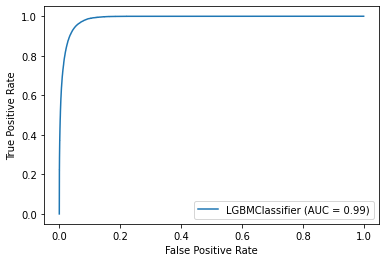

- Plot test roc


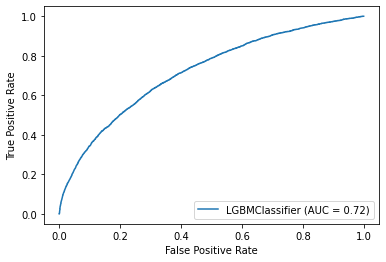

***** END Report for classifer Gradient Boost *****
Training...
Training time for LogisticRegression: 1.46778564453125 min
***** START Report for classifer LogisticRegression *****
- Train accuracy:  0.9233625389266763
- Test accuracy:  0.8841934173100365
- Train confusion matrix
        pred:0  pred:1
true:0  254193     224
true:1   20891     210
- Test confusion matrix
        pred:0  pred:1
true:0   28246      23
true:1    3682      42
- Train precision:  [0.92405592 0.48387097]
- Train recall:  [0.99911956 0.00995213]
- Test precision:  [0.88467803 0.64615385]
- Test recall:  [0.99918639 0.0112782 ]
- Train f1:  0.019503134432319477
- Test f1:  0.022169437846397466
- Train auc:  0.748574627256077
- Test auc:  0.7519032283791603
- Plot train roc


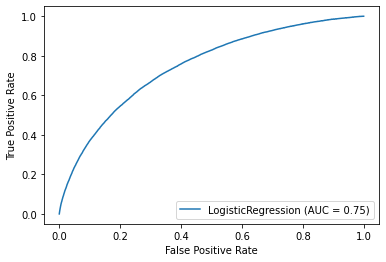

- Plot test roc


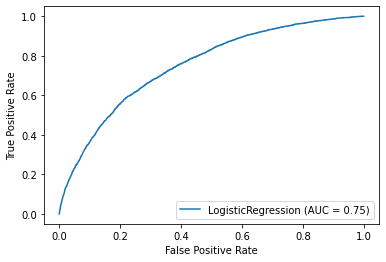

***** END Report for classifer LogisticRegression *****
Training...
Training time for NeuralNetwork: 5.603526981671651 min
***** START Report for classifer NeuralNetwork *****
- Train accuracy:  0.9267815532923439
- Test accuracy:  0.8813803019410497
- Train confusion matrix
        pred:0  pred:1
true:0  253397    1020
true:1   19153    1948
- Test confusion matrix
        pred:0  pred:1
true:0   28014     255
true:1    3540     184
- Train precision:  [0.92972666 0.65633423]
- Train recall:  [0.99599083 0.0923179 ]
- Test precision:  [0.88781137 0.4191344 ]
- Test recall:  [0.99097952 0.04940924]
- Train f1:  0.16186796293988118
- Test f1:  0.08839779005524862
- Train auc:  0.8253408880426291
- Test auc:  0.7087771523987421
- Plot train roc


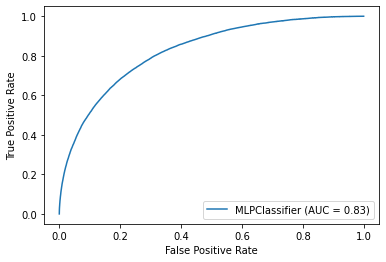

- Plot test roc


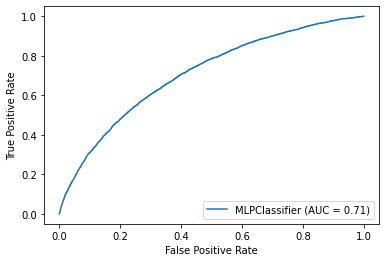

***** END Report for classifer NeuralNetwork *****


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier

# Use LogisticRegression, MLPClassifier, MLPClassifier classes
lg = LogisticRegression(C=1, solver='lbfgs', max_iter=8000)                                                       # YOUR CODE HERE
gb = LGBMClassifier(n_estimators=10000, objective = 'binary', class_weight = 'balanced', learning_rate = 0.05, reg_alpha = 0.1, reg_lambda = 0.1, subsample = 0.8, n_jobs = -1, random_state = 50, max_depth=5, num_leaves=30)                                                          # YOUR CODE HERE
nn = MLPClassifier(solver='adam', alpha=1e-3, activation='relu', hidden_layer_sizes=(50,), max_iter=1000)          # YOUR CODE HERE

# Test your classifers here
classifiers = [
    ("Gradient Boost", gb),
    ("LogisticRegression", lg),
    ("NeuralNetwork", nn),
]

# train and evaluate for each classifer
for name, clf in classifiers:
    train_classifier(name, clf, X_train_norm, y_train, X_test_norm, y_test)

## Analyzing the results

### Summary
Before analyzing the results above, let's summary our dataset for convenience. The **X_train** contains features for about 270000 clients, around 10% of the clients is labeled with 1 (1 means can not replay the loan). The **X_dev** includes about 30000 clients and also around 10% of the clients is labeled with 1. As you can see the datasets are unbalanced, just around 10% of the data is labeled with 1 and 90% for the label 0. So if you create dummy a classifer which always predicts label 0 for all the clients then about 90% of the time the classifer is correct which means the accuray is 0.9. But that is not what we really care about. The thing we really care about is finding clients with label 1 (clients who could not replay their loan) but the dummy classifer never finds that for us, so accuracy is a not good metric for this problem. Review the equations for calculating **precision**, **recall** and **f1** below and answer following quizzes.

$$
[\text{precision}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all data points with positive predictions]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false positives}]}
$$

$$
[\text{recall}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all positive data points]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false negatives}]}
$$

$$
[\text{f1}] = \frac{[\text{2 * precision * recall}]}{\text{[precision + reacall]}}
$$

### Analyzing
Write your results to the table below. Even though, it is a little bit tedious to do this but please for the purpose of learning. It is a good practice for your understanding. For **Precision**, **Recall**, **TP**, **FP**, **TN**, **FN** you only write for the results for the label 1.
<br>

| Classifer | Dataset | Accuracy | Precision | Recall | f1 | TP | FP | TN | FN | au_roc |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | -- |
| Gradient Boost Machine | train | 0.92 | 0.48 | 0.98 | 0.64 | 20742 | 22277 | 232140 | 359 | 0.99 |
| Gradient Boost Machine | test | 0.82 | 0.29 | 0.38 | 0.33 | 1443 | 3440 | 24829 | 2281 | 0.72 |
| Logisitc Regression | train | 0.92 | 0.48 | 0.01 | 0.02 | 210 | 224 | 254193 | 20891 | 0.75 |
| Logisitc Regression | test | 0.88 | 0.64 | 0.01 | 0.02 | 42 | 23 | 28246 | 3682 | 0.75 |
| Feed forward Neural Network | train | 0.92 | 0.65 | 0.09 | 0.16 | 1948 | 1020 | 253397 | 19153 | 0.83 |
| Feed forward Neural Network | test | 0.88 | 0.42 | 0.05 | 0.09 | 184 | 255 | 28014 | 3540 | 0.71 |

If your results are correct, the **train accuracy** for all classifiers are all above **0.9**, above **0.85** for the **test** set. But the precision for the label 1 is not so high, only around **0.3** on the **test** set for **Gradient Boost Machine (GBM)** and **Neural Network (NN)** and **0.6** for **Logistic Regression (LG)**. What about the recall, around **0.25** for **GBM**, **NN** and **0.01** for **LG** on the **test** set. You also see **LG** have the highest **precision** but lowest **recall** on the test set. About the **f1** score, **LG** get **0.02** for both train and test set; which is really low, clearly **LG** is underfit the data; for **GBM** and **NN** we get around **0.75** for the train set and only around **0.2** for the test set; which means they are clearly overfit the data.
<br>

### (Optional) AUROC
Usually, your classifers will output a probability scores for a sample. By default, when you use the **predict** function from sklearn, it uses a threshold = 0.5 to decide what class for a sample. But what about we want to test out different thresholds. So the auroc metric measures how good the classifer can distinguish between two classes and are invariant to the threshold. For more details about the auroc metric, check out the following links:
<br>
https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it
<br>
https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
<br>
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
<br>
Our classifers get decent auroc scores, around **0.6** - **0.7** for all classifers on the **test** set.